In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
%%javascript
IPython.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');

In [1]:
eqLabelWithNumbers=0
%run nbinit.ipy
js_addon()

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Loading customized Javascript for LaTeX typesetting
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
Overriding run-range javascript function


In [7]:
from IPython.display import clear_output, display, HTML, Image, Javascript
def js_addon():
    addon = open("./jfb-local-latex-tools.js", "r").read()
    return Javascript(addon)
js_addon()

In [11]:
h="""<style>
    div.text_cell_render{
        font-family: Arial, Helvetica, Computer Modern, "Helvetica Neue", Geneva, sans-serif;
        line-height: 145%;
        font-size: 120%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
        font-family: Helvetica, serif;
    }
    .CodeMirror{
            font-family: Arial, "Source Code Pro", source-code-pro,Consolas, monospace;
            font-family: Helvetica, serif;
	color: darkblue;
        }
        </style>
"""
display(HTML(h))

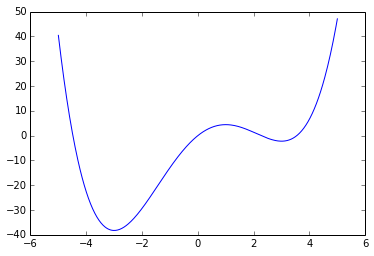

In [5]:
x=np.linspace(-5,5,400)
y=(x-1)*(x+3)*(x-3) # 
y=x**4/4 - x**3/3 - 9*x**2/2 + 9*x
plt.plot(x,y)

- [Gradient descent](http://en.wikipedia.org/wiki/Gradient_descent)
- [Gradient desxcent (2)](http://www.onmyphd.com/?p=gradient.descent)
- [Conjugate gradients](http://en.wikipedia.org/wiki/Nonlinear_conjugate_gradient_method)

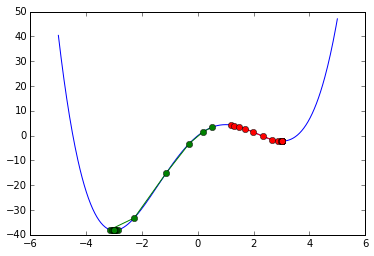

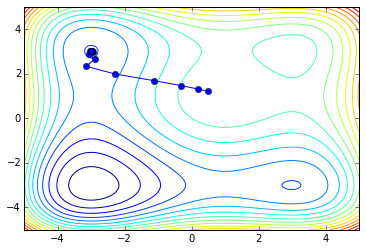

In [56]:

def f(x):
    return np.sum(x**4/4 - x**3/3 - 9*x**2/2 + 9*x) #np.sum(x**2) #
def ff(x):
    return np.array([f(xx) for xx in x])

def g(x):
    return((x-1)*(x+3)*(x-3)) # 2*x #

def grad_algo(f, g, mu, x0=0, eps=0.001, grad_prec=eps/10, itermax=200, line_search=True, verbose=True):
    
    def update_grad(xk,mu):
        return xk-mu*g(xk)
    
    xk=np.zeros((np.size(x0),itermax))
    xk[:,0]=x0
    err=1
    k=0
    while err>eps and k<itermax-1:
        err=norm(xk[:,k]-update_grad(xk[:,k],mu),1)
        xk[:,k+1]=update_grad(xk[:,k],mu)
        m=0
        #line search: look for a step that ensures that the objective function decreases
        if line_search:
            while f(xk[:,k+1])>f(xk[:,k]):
                #print("Updating..",  f(xk[k+1]),f(xk[k]))
                m=m+1
                xk[:,k+1]=update_grad(xk[:,k],mu*(0.5)**m)
        # avoid to stay stalled        
        if norm(g(xk[:,k])+g(xk[:,k-1]),1)<grad_prec: 
            #print("gradients..",  g(xk[k+1]),g(xk[k]))
            mu=mu*0.99
            xk[:,k+1]=update_grad(xk[:,k],mu)
        if verbose: 
            if np.size(x0)==1:
               print("current solution {:2.2f}, error: {:2.2e}, gradient {:2.2e}, objective {:2.2f}".format(xk[0,k+1],err,g(xk[0,k+1]),f(xk[0,k+1])))
            else:
                print("error: {:2.2e}, gradient {:2.2e}, objective {:2.2f}".format(err,norm(g(xk[:,k+1]),2),f(xk[:,k+1])))
               #pass     
        k=k+1
    return xk[:,:k]    

#
xk=grad_algo(f, g, mu=0.07, x0=[0.5, 1.2], eps=0.001, grad_prec=eps/10, itermax=200, line_search=False, verbose=False)
#xk=grad_algo(f, g, mu=0.05, x0=0.5, eps=0.001, grad_prec=eps/10, itermax=200, line_search=False, verbose=True)


x=np.linspace(-5,5,400)
plt.plot(x,ff(x))
x=xk[0,:]
plt.plot(x,ff(x),'o-')
x=xk[1,:]
plt.plot(x,ff(x),'o-')
plt.figure()


x=np.linspace(-5,5,100)
xx,yy=meshgrid(x,x)
z=np.zeros((len(xx),len(yy)))
for m,a in enumerate(x):
    for n,b in enumerate(x):
        z[n,m]=f(array([a,b]))
        #print(m,n,a,b,z[m,n])
#z=[[f(array([a,b])) for a in xx] for b in yy]
h = plt.contour(x,x,z,20)
plt.plot(xk[0,:],xk[1,:], 'o-')

In [ ]:
import sympy
x=sympy.symbols('x')
e=sympy.expand((x-1)*(x+3)*(x-3))
print(e)
sympy.integrate(e)
plot(e)

## A general filtering problem

In what follows, we will consider a general problem, which is sometimes called the `Wiener problem`.  Many actual problems, including filter identification, noise cancellation, linear prediction, etc can be formulated as special cases of this Wiener problem. 

The classical formulation is as follows: Given a random signal $u(n)$, we would like to find a transform $\mathcal{T}\{u\}$ such that the result is as close as possible to some `desired response` $d(n)$. We will restrict this general problem on two aspects. 

- First, we will only consider  `linear` transforms of the sequence $\{u(n)\}_{n=0..N-1}$; that is filterings of $u(n)$. Furthermore, we will even restrict ourselves to causal, finite impulse response filters with $p$ taps. We denote by $w$ (with $w$ for Wiener) the impulse response. For now, we assume that the system is stationary, which implies that the impulse response does not depend on time $n$. Hence, the output can be computed as the convolution product
\begin{equation}
\label{eq:filt}
y(n) = [w*u](n) = \sum_{m=0}^{p-1} w(m)u(n-m)
\end{equation}
- Second, the notion of  ``as close as'' will be quantified by a cost function on the error
\begin{equation}
\label{eq:error}
e(n) =  y(n) - d(n).
\end{equation}
Any cost function could be used, such as $|\bullet|$, $|\bullet|^2$, $|\bullet|^3$ or even $\sinh{e(n)}$... Among these possibilities, the square of the error yields interesting, closed-form solutions and simple computations. 

We can  choose to work only with the sequences at hand and look at an integrated error such as
\begin{equation}
\label{eq:LScriterion}
J_\mathrm{ls}(w,n_0,n_1) =  \sum_{n=n_0}^{n_1} {e(n)^2}
\end{equation}
Such a criterion is called the Least Square criterion. 
We may also choose to work with the stochastic processes on average, and consider a `mean square error`
\begin{equation}
\label{eq:MSEcriterion}
J_\mathrm{mse}(w,n) =  \E{e(n)^2}.
\end{equation}
The corresponding criterion is the Minimum Mean Square Error criterion. 
 

Definitions
$$\def\ub{\mathbf{u}}
\def\wb{\mathbf{w}}
\def\wbopt{\mathop{\mathbf{w}}\limits^\triangle}
\def\deriv#1#2{\frac{\mathrm{d}#1}{\mathrm{d}#2}}
\def\Ub{\mathbf{U}}
\def\db{\mathbf{d}}
\def\eb{\mathbf{e}}
$$

## The Linear Minimum Mean Square Error Estimator

Let us define by $\ub(n)$ the $p\times1$  column vector collecting $p$ consecutive samples of the input
$$\ub(n)^T=\left[ u(n), u(n-1), \ldots u(n-p+1)\right],$$
and by $\wb$ the vector collecting the samples of the impulse response:
$$\wb^T=\left[ w(0), w(1), \ldots w(p-1)\right].$$
Clearly, the output (\ref{eq:filt}) of  filter $\wb$  can be written as the dot product $y(n)=\wb^T\ub(n)$, and the error is simply 
$$
e(n) = \wb^T\ub(n) - d(n). 
$$
Observe that $J_\mathrm{mse}(\wb,n) $  is a quadratic form in $\wb$. Therefore, the criterion admits a single global minimum. To see this, let us develop the MSE:
$$
\begin{align}
J_\mathrm{mse}(\wb,n) &  = \E{\left(\wb^T\ub(n) - d(n) \right)\left(\ub(n)^T\wb(n) - d(n) \right)} \\
 & = \wb^T \E{\ub(n) \ub(n)^T}\wb(n) - 2\wb^T \E{\ub(n)d(n)} + \E{d(n)^2}  \\
 & = \wb^T \Rb_{uu} \wb(n) - 2\wb^T \Rb_{du} +\sigma_d^2 \label{eq:MSEdev}
\end{align}
$$
where we  denoted 
\begin{cases}
\Rb_{uu} = \E{\ub(n) \ub(n)^T} & \text{the correlation matrix of $\ub(n)$} \\
\Rb_{du} = \E{d(n) \ub(n) } & \text{the correlation vector of $d(n)$ and $\ub(n)$} 
\end{cases}
We also used the fact that the dot product between two vectors is scalar and therefore equal to its transpose: e.g. $\wb^T\ub(n)=\ub(n)^T\wb$. 

From formula (\ref{eq:MSEdev}), it can be checked that the MSE can also be put into the form of a perfect square, as
\begin{equation}
J_\mathrm{mse}(\wb,n)  =  (\wb-\wbopt)^T \Rb_{uu} (\wb-\wbopt) - \wbopt ~^T\Rb_{uu}\wbopt +\sigma_d^2 \label{eq:MSEasperfectsaquare}
\end{equation}
if
\begin{equation}
\eqboxc{
\wbopt:  \Rb_{uu} \wbopt= \Rb_{du} }
\label{eq:normaleq} 
\end{equation}
Since the quadratic form in (\ref{eq:MSEasperfectsaquare}) is always nonnegative, we see that the MSE is minimum if and only if 
\begin{equation}
\eqboxd{
\wb=\wbopt=\Rb_{uu}^{-1} \Rb_{du} ,}
\label{eq:wopt} 
\end{equation}
assuming that $\Rb_{uu}$ is invertible. 


Alternatively, the minimum can also be found by equating the derivative of the criterion to zero. Indeed, this derivative is 
$$
\deriv{} {\wb} J_\mathrm{mse}(\wb,n)= \deriv{\E{e(n)^2}} {\wb} = 2 \E{ \deriv{e(n)}{\wb} e(n) }. 
$$
Since $e(n) = \wb^T\ub(n) - d(n)$, its derivative with respect to $\wb$ is $\ub(n)$, and it remains
$$
\begin{align}
\deriv{ } {\wb} J_\mathrm{mse}(\wb,n) & = 2 \E{ \ub(n) e(n) } \\ 
&= 2 \E{ \ub(n) \left(\ub(n)^T\wb - d(n)\right)  }   \\
& = 2 \left(\Rb_{uu} \wb -  \Rb_{du} \right).     
\end{align}
$$
Hence, the derivative is zero if and only if $\Rb_{uu} \wb = \Rb_{du} $ which is the solution (\ref{eq:wopt}). 

Interestingly, we see that the optimum estimator depends only on the second order properties of  the desired response and the input sequence. This is a consequence of our choice of restricting ourselves to a quadratic criterion and a linear transform. 

## The Least Square Error Estimator

The derivation of the least-squares estimator closely follows the steps we used for the MMSE estimator. This follows easily once the problem is formulated in matrix form. 
Define the error vector as $\mathbf{e}(n_0,n_1)^T = \left[ e(n_0), e(n_0+1), \ldots e(n_1)\right]$. Each component of the error, say $e(k)$ is equal to 
$$e(k)= \ub(k)^T\wb - d(k).$$ 
Therefore, we have
$$
\begin{bmatrix}
u(n_0) & u(n_0-1) & \ldots & u(n_0-p+1) \\
u(n_0+1) & u(n_0) & \ldots & u(n_0-p+2) \\
\vdots & \ddots & & \vdots  \\
u(n_1) & u(n_1-1) & \ldots & u(n_1-p+1) \\
\end{bmatrix} 
\wb 
- 
\begin{bmatrix}
d(n_0) \\
d(n_0+1) \\
\vdots  \\
d(n_1)\\
\end{bmatrix} 
=
\begin{bmatrix}
e(n_0) \\
e(n_0+1) \\
\vdots  \\
e(n_1)\\
\end{bmatrix}. 
$$
This can also be written in compact form as
$$
\Ub(n_0,n_1)\wb - \db(n_0,n_1) = \eb(n_0,n_1).
$$
Then, the LS criterion (\ref{eq:LScriterion}) can be reformulated as
$$
J_\mathrm{ls}(w,n_0,n_1)   =  \sum_{n=n_0}^{n_1} {e(n)^2} =  \eb(n_0,n_1)^T \eb(n_0,n_1) 
$$
that is 
$$
J_\mathrm{ls}(w,n_0,n_1)  = \left( \Ub(n_0,n_1)\wb - \db(n_0,n_1)\right)^T \left( \Ub(n_0,n_1)\wb - \db(n_0,n_1)\right). 
$$
Now, it is a simple task to compute the derivative of this LS criterion with respect to $\wb$. One readily obtain
$$
\deriv{} {\wb} J_\mathrm{ls}(w,n_0,n_1)  = 2  \Ub(n_0,n_1)^T \left( \Ub(n_0,n_1)\wb - \db(n_0,n_1)\right),
$$
which is equal to zero if and only if
\begin{equation}
\Ub(n_0,n_1)^T \Ub(n_0,n_1) \wb = \Ub(n_0,n_1)^T \db(n_0,n_1). 
\label{eq:LSestimate1}
\end{equation}


The different matrices and vectors above depend on two indexes $n_0$ and $n_1$. It is now time to discuss the meaning of these indexes and the possible choices for their values. Suppose that the data are available on $N$ samples, from $n=0$ to $n=N-1$. When we want to compute the error $e(k)$, with $k<p$, we see that the result depend on unobserved values. The same kind of problem occurs if we want to compute the error for $k>N-1$. Therefore we face the problem of affecting a value to unobserved values. A possibility is to take a value of zero for unobserved vales. Another possibility consists in affecting the values by periodization, modulo $N$, of the available data. A last possibility is to avoid the situations which request the use of unknown values.  

The two main choices are the following:

- If we want to use only known values, it suffices to restrict the summation interval to the interval with $n_0=p-1$ and $n_1=N-1$. The matrix $\Ub$ has dimensions $(N-p)\times p$.This choice is sometimes known as the `covariance form`. 
- If we choose $n_0=0$ and $n_1=N-p-2$, with unknown values taken as zero, the corresponding choice is called `correlation form`. The data matrix has now dimensions $N+p-1 \times p$. 

It is now easy to see that the generic term of 
$\left[\Ub(n_0,n_1)^T \Ub(n_0,n_1) \right]_{ij}$ has the form $\sum_n u(n-i) u(n-j)$, that is, is (up to a factor) an estimate of the correlation $R_{uu}(i-j)$. Consequently, we have an estimate  of the correlation matrix $\Rb_{uu}$ given by
$$
\hat{\Rb}_{uu} = \left[\Ub(n_0,n_1)^T \Ub(n_0,n_1) \right].
$$ In the case of the choice of the correlation form for the data matrix, the resulting estimate of the correlation matrix has Toeplitz symmetry. It is interesting to note that by construction, the estimated correlation matrix is automatically non-negative definite.  Similarly, $\Rb_{du}$  can be estimated as 
$$ 
\hat{\Rb}_{du} = \Ub(n_0,n_1)^T \db(n_0,n_1).
$$
Finally, the LS estimate is 
\begin{equation}
\eqboxd{
\wbopt ~_{ls} = \left[ \Ub(n_0,n_1)^T \Ub(n_0,n_1)\right]^{-1}    \Ub(n_0,n_1)^T \db(n_0,n_1) =\hat{\Rb}_{uu}^{-1}  \hat{\Rb}_{du} }.
\label{eq:LSestimate2}
\end{equation}

### Application to filter identification

We will apply these results to the problem of filter identification. Let us briefly state the problem: we observe the noisy output $y$ of an unknown system with impulse response $h_\mathrm{test}$ and a known input $x$. The goal is to identify  $h_\mathrm{test}$ given $y$ and $x$. 

We begin by simulating the problem. You may use the function `lfilter` to compute the output of the system. Take a gaussian noise `np.random.normal` or `np.random.randn`  with unit variance on $N$ points, and add  a gaussian noise with scale factor 0.1 on the output. 

In [ ]:
# DO IT YOURSELF!
#
from scipy.signal import lfilter
N=0  # update this
x=0  # update this
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
#y=
plt.plot(y)
plt.xlabel("Time")
plt.title("Observation")
figcaption("System output in an identification problem")

In [108]:
show_solution(2)

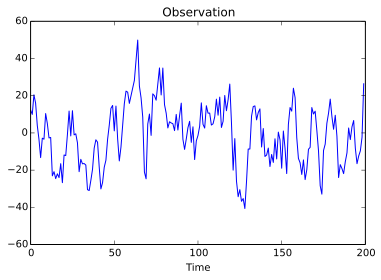

In [107]:
from scipy.signal import lfilter
# test
N=200
x=np.random.randn(N)
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
#L=size(htest)
#yo=zeros(N)
#for t in range(L,200):
#    yo[t]=htest.dot(x[t:t-L:-1])
#y=yo+ 0.1*randn(N)
y=lfilter(htest,[1],x)+0.1*randn(N)
plt.plot(y)
plt.xlabel("Time")
plt.title("Observation")
figcaption("System output in an identification problem")

Comment

###The sum of $n$ terms of a geometric series of matrices


\begin{proposition}
The sum of the first $n$ terms of the geometric series $B^k$, where $B$ is any square matrix
$$
S_n=B^0+B+B^2+\ldots+B^k+\ldots+B^n  
\label{eq:geometricseries}
$$
is given by 
\begin{equation}
\eqboxd{
S_n=(1-B)^{-1}(1-B^{n+1})
}.
\label{eq:sumgeometricseries}
\end{equation}
If the [spectral radius](http://en.wikipedia.org/wiki/Spectral_radius) of $B$ is less than 1, then $\lim_{n\rightarrow\infty} B^n=0$, and 
\begin{equation}
\eqboxc{
S_\infty=(1-B)^{-1}
}.
\label{eq:sumgeometricseries}
\end{equation}

\end{proposition}

\begin{proof}
Consider the geometric series
$$
B^0+B+B^2+\ldots+B^k+\ldots
$$
where B is any matrix. The sum of the first $n$ terms of this geometric series is given by (\ref{eq:geometricseries}).
Of course, we also have 
$$
\begin{align}
BS_n & =B+B^2+\ldots+B^n+B^{n+1} \\
   & = S-1+ B^{n+1} . 
\end{align}   
$$
Therefore we have
$$
(B-1)S_n=-1+ B^{n+1},
$$
and finally the result (\ref{eq:sumgeometricseries}) follows after applying the left inverse of $(B-1)$ to both sides.
\end{proof}

**Application** -- This can be applied for instance to the matrix $B=1-\mu A$. Here it gives
$$
\eqboxb{
\displaystyle{
\mu S_\infty=\mu \sum_{k=0}^{+\infty} (1-\mu A)^k = A^{-1}
}}\label{eq:inv_by_series}
$$
provided that the spectral radius of $(1-\mu A)$ is less than one. 

\begin{remark} If $B$ has a spectral radius less than one, then $(1-B)$ is invertible. 
Consider the eigendecomposition of $B$ as:
$$
B=V\Lambda V^{-1},
$$
where V is the matrix of right eigenvectors of $B$, and $\Lambda$ the corresponding diagonal matrix of eigenvalues. Then $(1-A)=(VV^{-1}- V \Lambda V^{-1})=V(1-\Lambda)V^{-1}$. The last relation is noting but a possible eigendecomposition of $(1- B)$. This shows that the corresponding eigenvalues have the form $1-\lambda_i$. If all the eigenvalues have a modulus inferior to 1, then $1-\lambda_i$ is never equal to zero and the matrix $(1-B)$ is invertible. 
\end{remark}

Let us illustrate numerically that the sum of the geometric series generated by $B$ is indeed $(I-B)^{-1}$

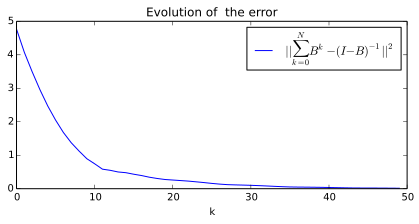

In [101]:
# We generate a random matrix B, compute its eigendecomposition and normalize by the maximum
# eignevalue. Therefore, the spectal radius is inferior to 1, and the property applies
p=50
B=np.random.randn(p,p)
L,V= np.linalg.eig(B)
ll=np.max(np.abs(L))
B=B/(1.1*ll)

# Now we compute the true inverse of (I-B):
I=np.eye(p)
IBi=np.linalg.inv(I-B)

N=50  # number of terms in the sum
err=np.zeros(N) # Evolution of error
S=np.zeros(p)
C=I   # initial C

for k in np.arange(N):
    S=S+C
    C=C.dot(B)
    err[k]=np.linalg.norm(IBi-S,2)

plt.figure(figsize=(7,3))
plt.plot((abs(err)), label="$||\sum_{k=0}^N B^k - (I-B)^{-1}||^2$")
plt.title("Evolution of  the error")
plt.xlabel("k")
plt.legend()

### An iterative formula for computing the solution of the normal equation
Let us now return to the normal equation 
$$
\wb = \Rb_{uu}^{-1} \Rb_{du}. 
$$
By the property (\ref{eq:inv_by_series}), the inverse of the correlation matrix can be computed as
$$
\Rb_{uu}^{-1} = \mu \sum_{k=0}^{+\infty} (1-\mu \Rb_{uu})^k.
$$
Therefore, if we use a sum of order $n$, we have
$$
\wb(n) = \mu \sum_{k=0}^{n} (1-\mu \Rb_{uu})^k  \Rb_{du}. 
$$
The term of rank $(n+1)$ can then be expressed as
$$
\begin{align}
\wb(n+1) & = \mu \sum_{k=0}^{n+1} (1-\mu \Rb_{uu})^k  \Rb_{du} \\
& = \mu (1-\mu \Rb_{uu}) \sum_{k=0}^{n} (1-\mu \Rb_{uu})^k  \Rb_{du} + \mu (1-\mu \Rb_{uu})^0  \Rb_{du}\\
& = (1-\mu \Rb_{uu}) \wb(n) + \mu   \Rb_{du}\\
\end{align}
$$
that is also
$$
\eqboxc{
\wb(n+1)  = \wb(n) -\mu (\Rb_{uu} \wb(n) -  \Rb_{du})
}
$$
Hence, we obtain an iterative formula for computing the solution of the normal equation (\ref{eq:normaleq}), without explicitly computing the inverse of the correlation matrix. It is an exact algorithm, which converges to the true solution:
$$
\lim_{n\rightarrow\infty} \wb(n) = \wbopt =  \Rb_{uu}^{-1} \Rb_{du}.
$$
This algorithm also appears as a steepest descent algorithm applied to the minimization of the Mean Square Error. This interpretation will then form the basis of the very popular Least Mean Square (LMS) algorithm. 

### The steepest descent algorithm

In [95]:
p=5
A=np.random.randn(p,p)
Ai=np.linalg.inv(A)
I=np.eye(p)

L,V= np.linalg.eig(A)
ll=np.max(np.abs(L))
llr=np.max(np.real(L))
llri=np.min(np.real(L))
lli=np.max(np.imag(L))
print('L',L)
print(ll, llri, llr, lli)
A=A/ll
LL,V= np.linalg.eig(A)
print('LL',abs(LL))

mu=np.min([2/ll, abs(2/llri), 2/llr, 2/lli])
mu=1
print('mu',mu)
LL,V= np.linalg.eig(I-mu*A)
print('LL',LL)

L [-1.62167012+0.70961156j -1.62167012-0.70961156j -1.12778282+0.j
  1.00200365+0.j          1.30222646+0.j        ]
1.77013066052 -1.62167012429 1.30222645921 0.709611558027
LL [ 1.          1.          0.6371184   0.56606197  0.73566686]
mu 1
LL [ 1.91613018+0.40088089j  1.91613018-0.40088089j  1.63711840+0.j
  0.43393803+0.j          0.26433314+0.j        ]


In [ ]:
np.vdot

In [ ]:
import seaborn as sns

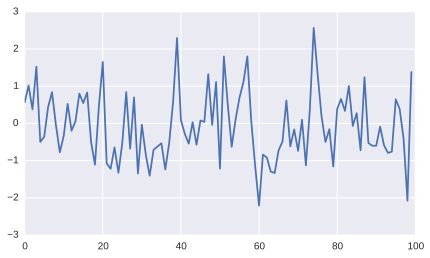

In [25]:
x=randn(100)
plt.figure(figsize=(7,4))
plt.plot(x)

In [16]:
import numpy as np
import scipy.signal as sg

x=np.sin(2*np.pi*0.1*np.linspace(0,8000,10000))
fr=8000
from IPython.display import Audio, display
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

from IPython.html import widgets
@widgets.interact(t=(100., 5000., 100.))
def highpass(t):
    b, a = sg.butter(4, t/(fr/2.), 'high')
    x_fil = sg.filtfilt(b, a, x)
    play(x_fil, fr, autoplay=True)